After download the data using python scripts('nyc-motor-collisions.py'), we will use this notebook to perform an analysis of the data.

### 1. Import the package and downloaded datasets onto the workspace.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('nyc-collisions_1.csv')
data.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,...,vehicle_type_code1,contributing_factor_vehicle_2,vehicle_type_code2,contributing_factor_vehicle_3,vehicle_type_code_3,contributing_factor_vehicle_4,vehicle_type_code_4,cross_street_name,contributing_factor_vehicle_5,vehicle_type_code_5
0,2024-12-06T00:00:00.000,14:16,QUEENS,11367.0,40.742200,-73.829880,61 RD,136 ST,0,0,...,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-12-06T00:00:00.000,9:20,BRONX,10475.0,40.890076,-73.819850,BOSTON RD,ROPES AVE,1,0,...,Sedan,Unspecified,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-12-06T00:00:00.000,6:10,BROOKLYN,11221.0,40.686367,-73.929750,MALCOLM X BLVD,PUTNAM AVE,2,0,...,Sedan,Unspecified,Station Wagon/Sport Utility Vehicle,Unspecified,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,NaN
3,2024-12-06T00:00:00.000,16:30,BROOKLYN,11214.0,40.608000,-74.001720,18 AVE,NEW UTRECHT AVE,0,0,...,Sedan,Unspecified,Station Wagon/Sport Utility Vehicle,Unspecified,Station Wagon/Sport Utility Vehicle,Unspecified,Bike,NaN,NaN,NaN
4,2024-12-06T00:00:00.000,16:48,QUEENS,11421.0,40.697560,-73.852745,WOODHAVEN BLVD,PARK LN S,1,0,...,E-Bike,Unspecified,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(254835, 28)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254835 entries, 0 to 254834
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     254835 non-null  object 
 1   crash_time                     254835 non-null  object 
 2   borough                        184737 non-null  object 
 3   zip_code                       184707 non-null  float64
 4   latitude                       254835 non-null  float64
 5   longitude                      254835 non-null  float64
 6   on_street_name                 180380 non-null  object 
 7   off_street_name                125210 non-null  object 
 8   number_of_persons_injured      254835 non-null  int64  
 9   number_of_persons_killed       254835 non-null  int64  
 10  number_of_pedestrians_injured  254835 non-null  int64  
 11  number_of_pedestrians_killed   254835 non-null  int64  
 12  number_of_cyclist_injured     

In [8]:
data.isnull().sum()

crash_date                            0
crash_time                            0
borough                           70098
zip_code                          70128
latitude                              0
longitude                             0
on_street_name                    74455
off_street_name                  129625
number_of_persons_injured             0
number_of_persons_killed              0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
contributing_factor_vehicle_1         0
collision_id                          0
vehicle_type_code1                    0
contributing_factor_vehicle_2     56640
vehicle_type_code2                83747
contributing_factor_vehicle_3    231189
vehicle_type_code_3              232909
contributing_factor_vehicle_4    248484
vehicle_type_code_4              248844


### 2. Data Wrangling

In [9]:
# from this point, we explore how much the impact from dropping some tables
# we considered that we need to drop the observations without the first car and its cause.
# then we decide to drop the accidient without coordinates specified.
len(data.dropna(subset = ['contributing_factor_vehicle_1','vehicle_type_code1','latitude','longitude']))/len(data)

1.0

In [10]:
data.dropna(subset = ['contributing_factor_vehicle_1','vehicle_type_code1','latitude','longitude'], inplace = True)

In [11]:
# observations with latitude == 0 also have those longitude == 0, we found around 2xxx observations at this point (around 1%)
(data[data['latitude'] == 0] == data[data['longitude'] == 0]).sum()

crash_date                       0
crash_time                       0
borough                          0
zip_code                         0
latitude                         0
longitude                        0
on_street_name                   0
off_street_name                  0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
contributing_factor_vehicle_1    0
collision_id                     0
vehicle_type_code1               0
contributing_factor_vehicle_2    0
vehicle_type_code2               0
contributing_factor_vehicle_3    0
vehicle_type_code_3              0
contributing_factor_vehicle_4    0
vehicle_type_code_4              0
cross_street_name                0
contributing_factor_vehicle_5    0
vehicle_type_code_5              0
dtype: int64

In [12]:
data['contributing_factor_vehicle_1'].value_counts()

contributing_factor_vehicle_1
Driver Inattention/Distraction                           63843
Unspecified                                              63029
Failure to Yield Right-of-Way                            17744
Following Too Closely                                    14638
Passing or Lane Usage Improper                           11151
Unsafe Speed                                              9407
Passing Too Closely                                       9255
Backing Unsafely                                          8053
Traffic Control Disregarded                               7514
Other Vehicular                                           7465
Turning Improperly                                        6132
Driver Inexperience                                       5379
Alcohol Involvement                                       4779
Unsafe Lane Changing                                      4653
Reaction to Uninvolved Vehicle                            2857
Pedestrian/Bicyclist/Othe

### 3. Data Visualizations

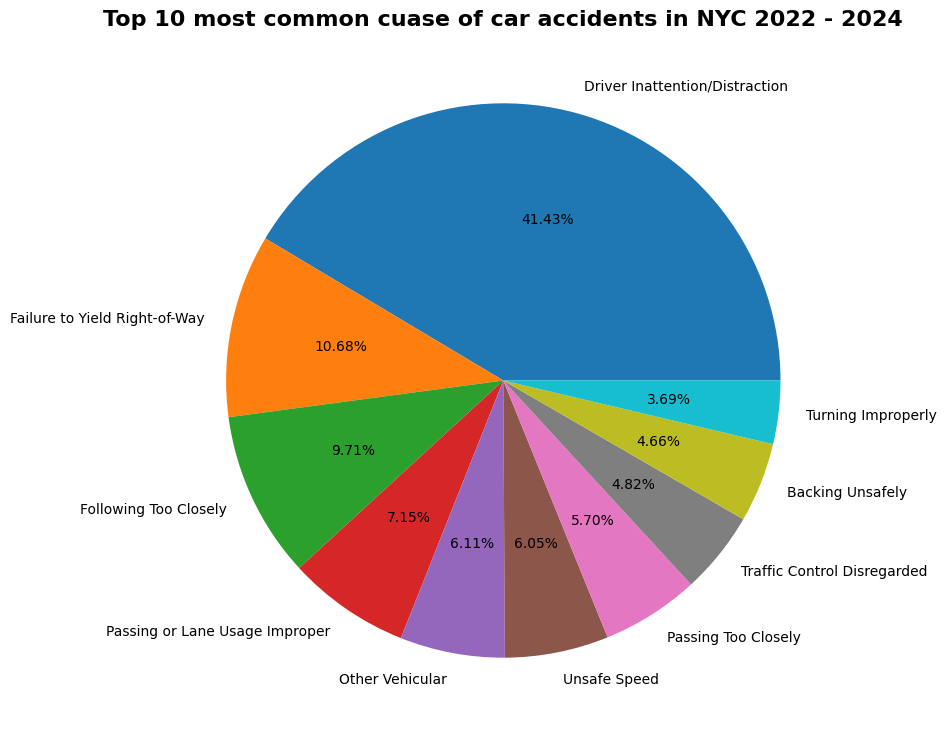

In [13]:
# find out the common cuase for vehicle collision
# concatenate the collision cause into one place
collisioncause = pd.concat([
    data['contributing_factor_vehicle_1'],
    data['contributing_factor_vehicle_2'],
    data['contributing_factor_vehicle_3'],
    data['contributing_factor_vehicle_4'],
    data['contributing_factor_vehicle_5']
], axis=0, ignore_index=True) 

# filter the values 'Unspecified' out from our analysis
collisioncause = collisioncause[collisioncause != 'Unspecified']

# made it a DataFrame, reset the index, and rename the columns
collisioncause = pd.DataFrame(collisioncause.value_counts())
collisioncause.reset_index(inplace=True)
collisioncause.columns = ['cause','count']

# visualizations of collision cause
plt.figure(figsize=(16,9))
plt.pie(collisioncause['count'][0:10], labels = collisioncause['cause'][0:10], autopct = '%.2f%%')

# add the title
plt.title('Top 10 most common cuase of car accidents in NYC 2022 - 2024', fontsize = 16, fontweight = 'bold')

# show the chart
plt.show()

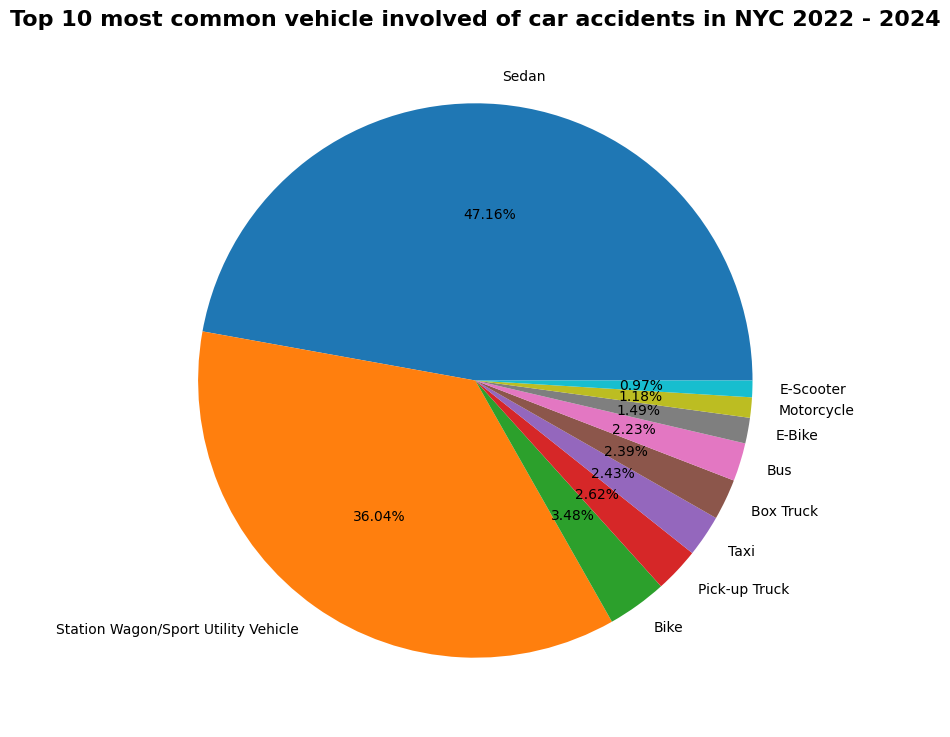

In [14]:
# then, we will find out the most common vehicle type to be collided.
collisionvehicle = pd.concat([
    data['vehicle_type_code1'],
    data['vehicle_type_code2'],
    data['vehicle_type_code_3'],
    data['vehicle_type_code_4'],
    data['vehicle_type_code_5']
], axis=0, ignore_index=True) 

# filter the values 'Unspecified' out from our analysis
collisionvehicle = collisionvehicle[collisionvehicle != 'Unspecified']

# made it a DataFrame, reset the index, and rename the columns
collisionvehicle = pd.DataFrame(collisionvehicle.value_counts())
collisionvehicle.reset_index(inplace=True)
collisionvehicle.columns = ['cause','count']

# visualizations of collision cause
plt.figure(figsize=(16,9))
plt.pie(collisionvehicle['count'][0:10], labels = collisionvehicle['cause'][0:10], autopct = '%.2f%%')

# add the title
plt.title('Top 10 most common vehicle involved of car accidents in NYC 2022 - 2024', fontsize = 16, fontweight = 'bold')

# show the chart
plt.show()

In [15]:
# find out the most common collision cause by vehicle type
data.groupby(['vehicle_type_code1','contributing_factor_vehicle_1'])['collision_id'].count().sort_values(ascending=False)

vehicle_type_code1                   contributing_factor_vehicle_1 
Sedan                                Unspecified                       31602
                                     Driver Inattention/Distraction    29139
Station Wagon/Sport Utility Vehicle  Driver Inattention/Distraction    23023
                                     Unspecified                       21321
Sedan                                Failure to Yield Right-of-Way      7590
                                                                       ...  
4                                    Other Vehicular                       1
3-Door                               View Obstructed/Limited               1
standing s                           Unspecified                           1
scooter                              Turning Improperly                    1
                                     Following Too Closely                 1
Name: collision_id, Length: 2389, dtype: int64

In [16]:
# find out the most frequent collision site (site is defined by borough)
data['borough'].value_counts()

borough
BROOKLYN         64065
QUEENS           50287
MANHATTAN        32801
BRONX            30078
STATEN ISLAND     7506
Name: count, dtype: int64

In [17]:
import geopandas as gpd
from shapely.geometry import Point

                     crash_date crash_time        borough  zip_code  \
0       2024-12-06T00:00:00.000      14:16         QUEENS   11367.0   
1       2024-12-06T00:00:00.000       9:20          BRONX   10475.0   
2       2024-12-06T00:00:00.000       6:10       BROOKLYN   11221.0   
3       2024-12-06T00:00:00.000      16:30       BROOKLYN   11214.0   
4       2024-12-06T00:00:00.000      16:48         QUEENS   11421.0   
...                         ...        ...            ...       ...   
254830  2022-01-01T00:00:00.000       5:16         QUEENS   11106.0   
254831  2022-01-01T00:00:00.000      15:00          BRONX   10451.0   
254832  2022-01-01T00:00:00.000       4:20       BROOKLYN   11220.0   
254833  2022-01-01T00:00:00.000      15:16            NaN       NaN   
254834  2022-01-01T00:00:00.000      12:25  STATEN ISLAND   10312.0   

         latitude  longitude     on_street_name  off_street_name  \
0       40.742200 -73.829880              61 RD           136 ST   
1       40.

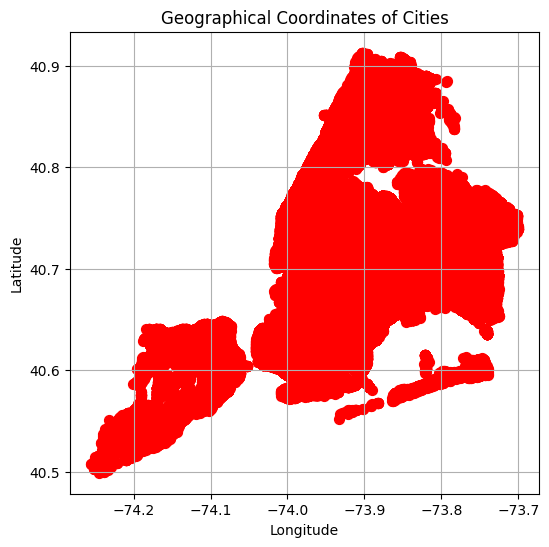

In [18]:
# Convert latitude and longitude to geometry points
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]

gdf = gpd.GeoDataFrame(data, geometry = geometry)
gdf.set_crs(epsg=4326, inplace=True)

print(gdf)

# Plot the points on a map
gdf.plot(marker='o', color='red', markersize=50, figsize=(10, 6))
plt.title("Geographical Coordinates of Cities")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Show the plot
plt.show()

In [19]:
# Load a world map shapefile from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgray')

# Plot the points (cities) on top of the world map
gdf.plot(ax=ax, marker='o', color='red', markersize=50)

# Add titles and labels
plt.title("Cities on World Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the map
plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [44]:
# which type of vehicle is the safest type
data.groupby(['vehicle_type_code1'])['collision_id'].count()

vehicle_type_code1
.              1
0000           1
10 Paaseng     1
100th truc     1
18 WHEELER     1
              ..
utv            1
utv bobcat     1
van           38
van truck      1
ХР06           1
Name: collision_id, Length: 663, dtype: int64